# Exciton Model for vdWHs

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import ase.units

Hartree = ase.units.Hartree
Bohr = ase.units.Bohr

In [42]:
%matplotlib inline

In [43]:
from matplotlib import rcParams
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern Roman"],
    "font.size": 16})
rcParams['axes.titlepad'] = 20

In [44]:
def heatmap(data, xlabels, ylabels, cbarlabel, **kwargs):
    # if not ax:
    #     ax = plt.gca()
    
    plt.imshow(data, **kwargs)
    plt.xticks(np.arange(len(xlabels)), labels=xlabels)
    plt.yticks(np.arange(len(ylabels)), labels=ylabels)

    im_ratio = data.shape[0]/data.shape[1]
    plt.colorbar(label=cbarlabel,fraction=0.046*im_ratio, pad=0.04)
    # cbar.ax.set_ylabel(cbarlabel, rotation=0, va="bottom")

    # Loop over data dimensions and create text annotations.
    for i in range(len(ylabels)):
        for j in range(len(xlabels)):
            colors = ['k', 'w']
            color = colors[int(data[i,j] > np.mean(data))]
            plt.text(j, i, data[i, j], ha="center", va="center", color=color)

## QEH Masses and Potentials

In [123]:
#materials = ['WS2','MoS2','WSe2','MoSe2','CrS2','CrSe2']
nFilling = 1
nPadding = 0
default_thick = 6
def load_hs(fileprefix,default_thick, nFilling, nPadding):
    vdWH = np.load('default_thick'+str(default_thick)+fileprefix + '_nFilling=' + str(nFilling) + '_nPadding=' + str(nPadding) + '.npz')
    return vdWH

In [131]:
vdWH_qeh = load_hs('wannier',default_thick, nFilling, nPadding)
E_b_heat_mat = vdWH_qeh['E_b_heat_mat']
E_b_heat_xlabels = vdWH_qeh['E_b_heat_xlabels']
E_b_heat_ylabels = vdWH_qeh['E_b_heat_ylabels']

In [132]:
#datacheck
EbMax=10
#E_b_heat_mat[1,2]=10
#print(E_b_heat_mat)
UpperBound=9
while EbMax>UpperBound:
    EbMax=np.max(E_b_heat_mat)
    if EbMax>UpperBound:
        #print(np.where(Eb_original==Ebmax))
        ne=np.where(E_b_heat_mat==EbMax)[0][0]
        ph=np.where(E_b_heat_mat==EbMax)[1][0]
        print(ne,ph)
        E_b_heat_mat=np.delete(E_b_heat_mat,ne,axis=0)#delete row
        E_b_heat_mat=np.delete(E_b_heat_mat,ph,axis=1)#delete column
        E_b_heat_xlabels=np.delete(E_b_heat_xlabels,ph)
        E_b_heat_ylabels=np.delete(E_b_heat_ylabels,ne)
        print(E_b_heat_mat)

10 12
[[0.25120922 0.23212844 0.22054061 0.19983875 0.30511215 0.23906587
  0.26291258 0.24472557 0.23705052 0.21705188 0.30047606 0.29528272
  0.26803479 0.25413381 0.24292338 0.30238191 0.2731694  0.20078249
  0.16353839 0.23150469 0.19732527 0.23677108 0.19629369 0.27274598
  0.29039681 0.25857561]
 [0.23232739 0.21732741 0.20772813 0.18995731 0.27361676 0.22456295
  0.2407083  0.22667797 0.22059594 0.20348277 0.26997281 0.26998185
  0.24440393 0.23482917 0.22539122 0.27743118 0.25291041 0.18825348
  0.15520594 0.21508979 0.18514729 0.2201155  0.1845281  0.25066877
  0.26706317 0.24051314]
 [0.22057806 0.2075987  0.1990929  0.18298644 0.25508686 0.21471977
  0.22709909 0.21509632 0.20988942 0.19444462 0.25193972 0.25425312
  0.23002811 0.22252034 0.21407106 0.26197812 0.24002778 0.17999574
  0.14948123 0.20452726 0.17704718 0.20917645 0.17651499 0.23673824
  0.25253056 0.22882503]
 [0.19968498 0.18966658 0.18281319 0.16947139 0.22513705 0.19623172
  0.20404753 0.19494428 0.19094987 

In [133]:
Ne,Nh=np.shape(E_b_heat_mat)
Eb_original=np.copy(E_b_heat_mat)
EbPlot=np.zeros((Ne,Nh))
Ebmax=np.max(Eb_original)
#print(np.where(Eb_original==Ebmax))
ne=np.where(Eb_original==Ebmax)[0][0]
ph=np.where(Eb_original==Ebmax)[1][0]
#print(ne,ph)
EbPlot[0,0]=Ebmax
Eb_original[ne,ph]=0
#initialize new labels
xlabelsPlot=[]
ylabelsPlot=[]
#add first elements to label
xlabelsPlot.append(E_b_heat_xlabels[ph])
ylabelsPlot.append(E_b_heat_ylabels[ne])
#initialize new orders
ColumnOrder=np.zeros((Nh))
RowOrder=np.zeros((Ne))
ColumnOrder[0]=ph
RowOrder[1]=ne
# vectors to sort by 
EbColumnsort=np.copy(Eb_original)[ne,:]
EbRowsort=np.copy(Eb_original)[:,ph]
#check with print statements
print(EbColumnsort)
print(EbRowsort)
print(EbPlot)
#sort p-doped materials (coloumns)
for i_h in range(1,Nh):
    #find max
    Ebmax_h=np.max(EbColumnsort)
    locmax_h=np.argmax(EbColumnsort)
    #update order and new energies and xlabel
    ColumnOrder[i_h]=locmax_h#update list of column orders
    EbColumnsort[locmax_h]=0#delete maximum from sorting energies
    EbPlot[0,i_h]=Ebmax_h#update Eb_matrix
    xlabelsPlot.append(E_b_heat_xlabels[locmax_h])#update xlabel
    #check with prints
    print(locmax_h)
    print(EbPlot)
    print(EbColumnsort)
    print(E_b_heat_xlabels[locmax_h])
    print(xlabelsPlot[i_h])

#sort n-doped materials (rows)
for i_e in range(1,Ne):
    #find max
    Ebmax_e=np.max(EbRowsort)
    locmax_e=np.argmax(EbRowsort)
    #update order and new energies and xlabel
    RowOrder[i_e]=locmax_e#update list of column orders
    EbRowsort[locmax_e]=0#delete maximum from sorting energies
    EbPlot[i_e,0]=Ebmax_e#add energy to Eb_matrix
    ylabelsPlot.append(E_b_heat_ylabels[locmax_e])#add label to xlabel
    #check with prints
    print(locmax_e)
    print(EbPlot)
    print(E_b_heat_ylabels[locmax_e])
#put in the rest of the elements in the energy matrix
for ie in range(1,Ne):
    for ih in range(1,Nh):
        #take locations
        loce=int(RowOrder[ie])
        loch=int(ColumnOrder[ih])
        print(loce,loch)
        #find energy and update
        Eb=Eb_original[loce,loch]
        EbPlot[ie,ih]=Eb
        

[0.34693226 0.31222548 0.2924404  0.25816698 0.         0.32585662
 0.37120419 0.33573168 0.32143975 0.28646147 0.45863595 0.43539964
 0.38320491 0.35317358 0.33246568 0.44592672 0.38819084 0.26015483
 0.20142968 0.31259491 0.25471428 0.32188813 0.25277864 0.39053705
 0.42231972 0.36110844]
[0.30511215 0.27361676 0.25508686 0.22513705 0.42361756 0.33354408
 0.30086314 0.2865668  0.25587716 0.41416894 0.34614735 0.3152062
 0.29707938 0.45180944 0.42210036 0.44936723 0.42941055 0.        ]
[[0.46925485 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  

In [134]:
def plot_E_B(E_b_heat_mat,E_b_heat_xlabels=xlabelsPlot,E_b_heat_ylabels=ylabelsPlot, cbarlabel = r'$E_b$ [meV]', file_ending='unknown'):
    heatmap(np.round(E_b_heat_mat*10**3).astype(int),
        E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=cbarlabel,
        cmap='Blues')
    plt.tight_layout()
    plt.savefig('./plots/vdWH_E_b_' + file_ending + '.pdf')
    plt.savefig('./plots/vdWH_E_b_' + file_ending + '.png')
    plt.show()

In [135]:
print(E_b_heat_mat[10,12],E_b_heat_mat[10,11])

0.2954804727048207 0.3235028379906284


Exciton binding energies for different
 bilayer combinations with 0 encapsulating and 1 inner hBN layers
 using QEH masses and potentials


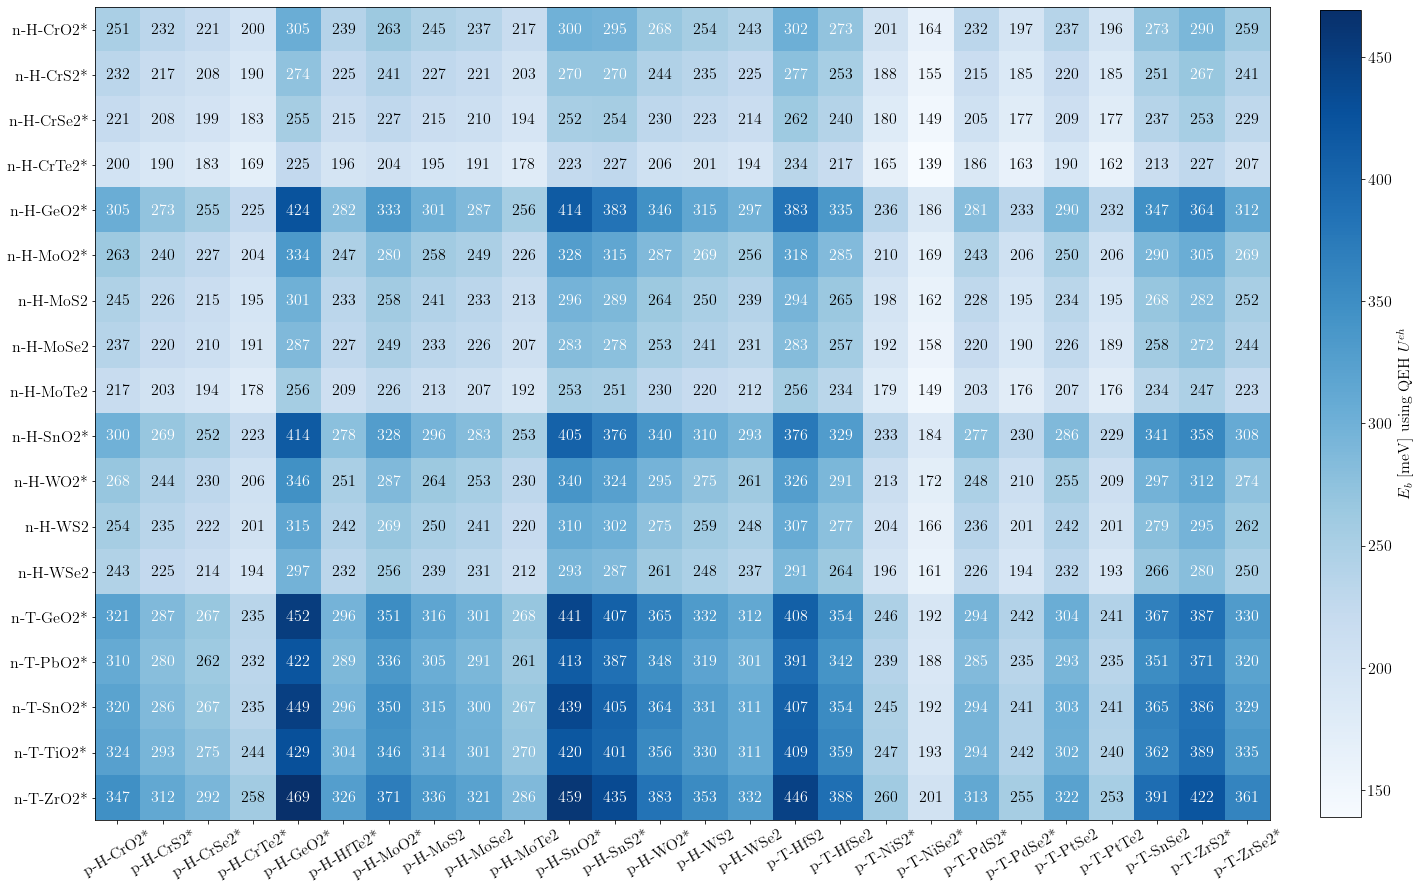

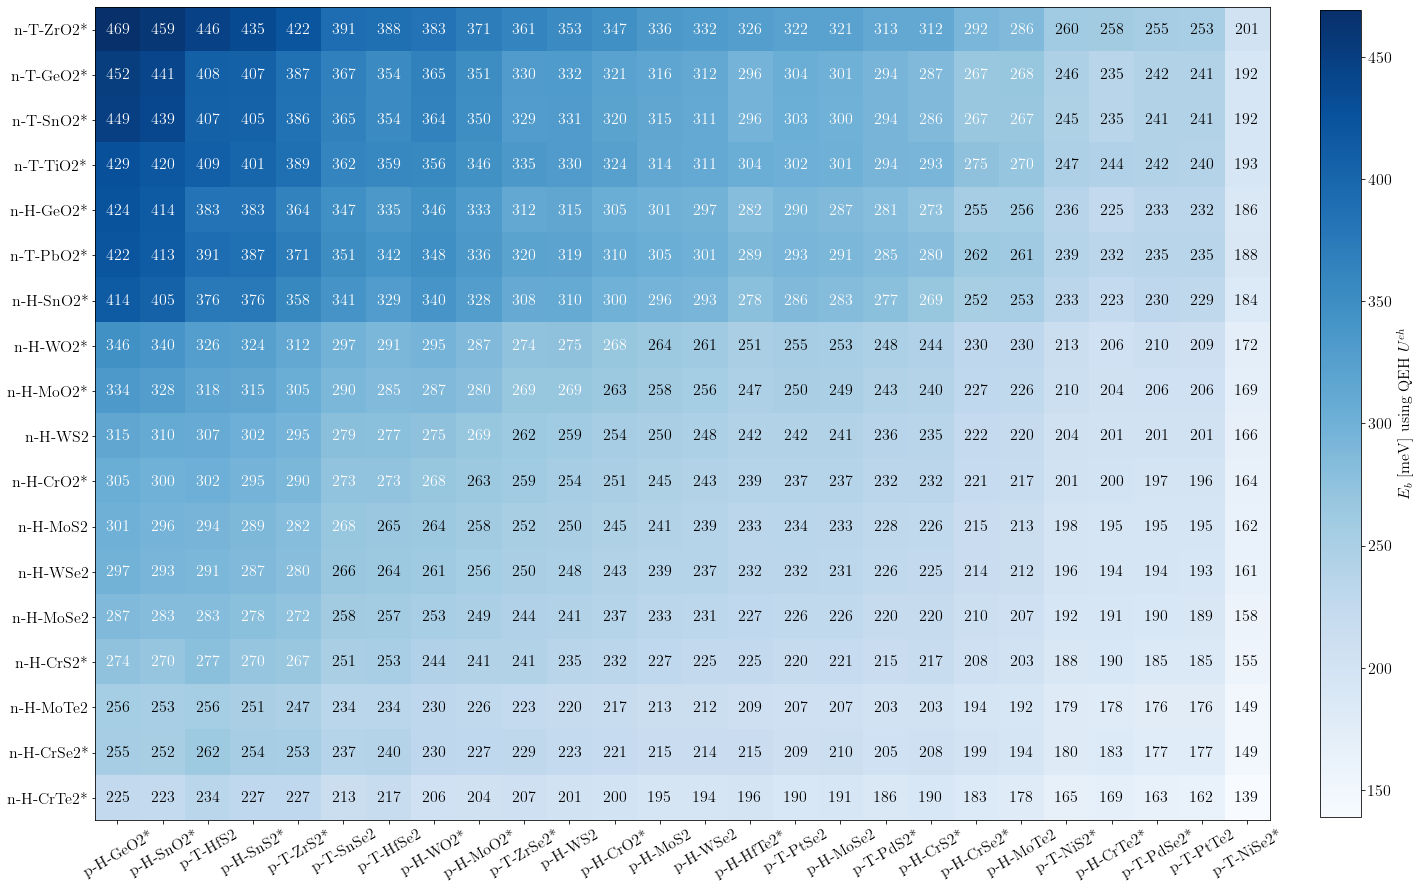

In [136]:
if default_thick==6:
    fig = plt.figure(1, figsize=(20,20))
else:
    fig = plt.figure(1, figsize=(6,6))
plt.xticks(rotation=30)
print('Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers\n using QEH masses and potentials'.format(nPadding, nFilling))
plot_E_B(E_b_heat_mat,E_b_heat_xlabels,E_b_heat_ylabels, cbarlabel=r'$E_b$ [meV] using QEH $U^{eh}$', file_ending='abinitio')
if default_thick==6:
    fig = plt.figure(1, figsize=(20,20))
else:
    fig = plt.figure(1, figsize=(6,6))
plt.xticks(rotation=30)
plot_E_B(E_b_heat_mat=EbPlot,E_b_heat_xlabels=xlabelsPlot,E_b_heat_ylabels=ylabelsPlot, cbarlabel=r'$E_b$ [meV] using QEH $U^{eh}$', file_ending='abinitio')

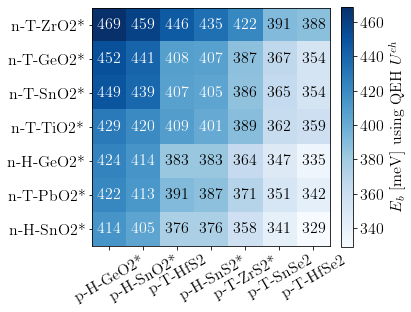

In [141]:
#if default_thick==6:
#    fig = plt.figure(1, figsize=(20,20))
#else:
#    fig = plt.figure(1, figsize=(6,6))
fig = plt.figure(1, figsize=(6,6))
plt.xticks(rotation=30)
plot_E_B(E_b_heat_mat=EbPlot[:7,:7],E_b_heat_xlabels=xlabelsPlot[:7],E_b_heat_ylabels=ylabelsPlot[:7], cbarlabel=r'$E_b$ [meV] using QEH $U^{eh}$', file_ending='abinitio')

Exciton binding energies for different
 bilayer combinations with 0 encapsulating and 1 inner hBN layers
 using QEH masses and potentials


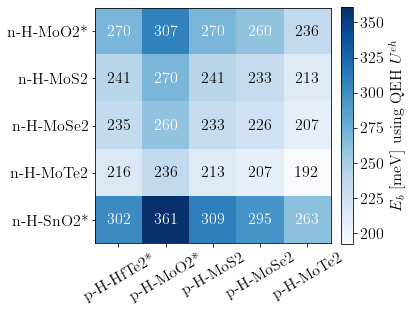

In [70]:
fig = plt.figure(1, figsize=(6,6))
plt.xticks(rotation=30)
print('Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers\n using QEH masses and potentials'.format(nPadding, nFilling))
plot_E_B(E_b_heat_mat,E_b_heat_xlabels,E_b_heat_ylabels, cbarlabel=r'$E_b$ [meV] using QEH $U^{eh}$', file_ending='abinitio')

## Analytic Coulomb potential using QEH Masses

[[0.45675283 0.45669162]
 [0.45669162 0.45663044]]
Exciton binding energies for different
 bilayer combinations with 0 encapsulating and 1 inner hBN layers
 Analytic Coulomb Potential using QEH Masses


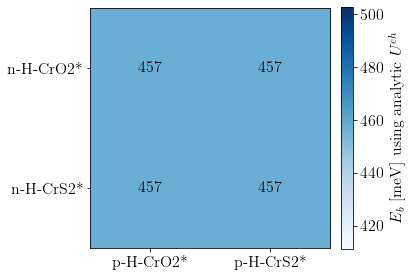

In [145]:
vdWH_analytic = load_hs('wannier_analytic',default_thick, nFilling, nPadding)
E_b_heat_mat = vdWH_analytic['E_b_heat_mat']
E_b_heat_xlabels = vdWH_analytic['E_b_heat_xlabels']
E_b_heat_ylabels = vdWH_analytic['E_b_heat_ylabels']
print(E_b_heat_mat)
fig = plt.figure(1, figsize=(6,6))
print('Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers\n Analytic Coulomb Potential using QEH Masses'.format(nPadding, nFilling))
plot_E_B(E_b_heat_mat,E_b_heat_xlabels,E_b_heat_ylabels, cbarlabel=r'$E_b$ [meV] using analytic $U^{eh}$', file_ending='analytic')

In [ ]:
#hallihalløj
#effective masses that we use
mu_matrix = vdWH_analytic['effmass_Matrix']

description = 'Exciton mass from QEH'
print(description)
print(mu_matrix)
heatmap(np.round(mu_matrix,2),
            E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'Exciton mass from QEH-library',
    cmap='Blues')
plt.tight_layout()
plt.savefig('./plots/vdWH_excMass_QEH.pdf')
plt.savefig('./plots/vdWH_excMass_QEH.png')
plt.show()

### Plot of exciton masses from QEH-Library

Exciton mass from QEH
[[0.16746269 0.20337209 0.17217391 0.21032967]
 [0.18987013 0.23739583 0.19594937 0.24693069]
 [0.18164384 0.22467391 0.1872     0.23319588]
 [0.20072289 0.25460784 0.20752941 0.26560748]]


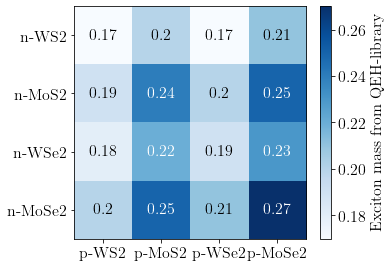

In [40]:
#effective masses that we use
me_vec=np.array([0.33,0.43,0.39,0.49])
mh_vec=np.array([0.34,0.53,0.36,0.58])

description = 'Exciton mass from QEH'
print(description)
mu_matrix=np.zeros((4,4))
for i in range(4):
    for j in range(4):
        mu_matrix[i,j]=1/(1/me_vec[i]+1/mh_vec[j])
print(mu_matrix)
heatmap(np.round(mu_matrix,2),
            E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'Exciton mass from QEH-library',
    cmap='Blues')
plt.tight_layout()
plt.savefig('./plots/vdWH_excMass_QEH.pdf')
plt.savefig('./plots/vdWH_excMass_QEH.png')
plt.show()

## Analytic Coulomb potential using Masses from Conti S. et al.

Exciton binding energies for different
 bilayer combinations with 0 encapsulating and 3 inner hBN layers
 Analytic Coulomb Potential using Masses from Conti et al.


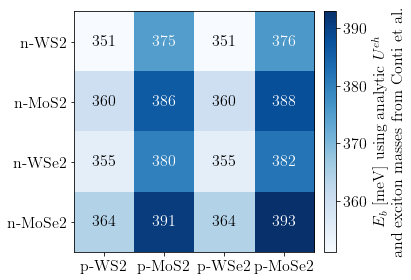

In [41]:
vdWH_analytic = load_hs('wannier_analytic_article_masses', nFilling, nPadding)
fig = plt.figure(1, figsize=(6,6))
print('Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers\n Analytic Coulomb Potential using Masses from Conti et al.'.format(nPadding, nFilling))
plot_E_B(vdWH_analytic, cbarlabel='$E_b$ [meV] using analytic $U^{eh}$ \n and exciton masses from Conti et al.', file_ending='analytic_articMass')

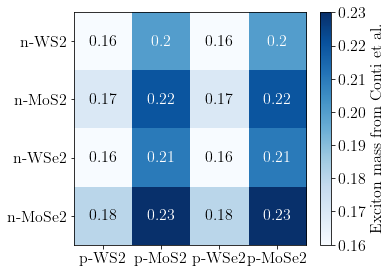

In [42]:
#data from article
me_vec=np.array([0.33,0.40,0.36,0.43])
mh_vec=np.array([0.30,0.48,0.30,0.50])

mu_matrix=np.zeros((4,4))
for i in range(4):
    for j in range(4):
        mu_matrix[i,j]=1/(1/me_vec[i]+1/mh_vec[j])
heatmap(np.round(mu_matrix,2),
            E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'Exciton mass from Conti et al.',
    cmap='Blues')
plt.tight_layout()
plt.savefig('./plots/vdWH_effMass_article.pdf')
plt.savefig('./plots/vdWH_effMass_article.png')
plt.show()

## Exciton Binding Energies from Conti et al.

In [43]:
Eb_article=np.array([[375,375,368,385],[390,396,388,405],[368,372,365,375],[400,405,390,412]])
Eb_article.transpose().flatten()

array([375, 390, 368, 400, 375, 396, 372, 405, 368, 388, 365, 390, 385,
       405, 375, 412])

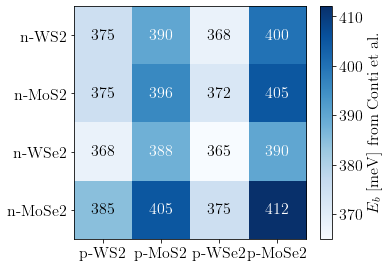

In [44]:
# Eb_matrix=np.array([[396,405,390,388],[405,412,400,390],[375,385,375,368],[372,375,368,365]]) # MoS2, MoSe2, WS2, WSe2
Eb_article=np.array([[375,375,368,385],[390,396,388,405],[368,372,365,375],[400,405,390,412]])
heatmap(np.round(Eb_article).transpose(),
            E_b_heat_xlabels, E_b_heat_ylabels, cbarlabel=r'$E_b$ [meV] from Conti et al.',
    cmap='Blues')
plt.tight_layout()
plt.savefig('./plots/vdWH_E_b_article_transpose.pdf')
plt.savefig('./plots/vdWH_E_b_article_transpose.png')
plt.show()

## QEH potential using Masses from Conti S. et al.

Exciton binding energies for different
 bilayer combinations with 0 encapsulating and 3 inner hBN layers
 QEH Potential using Masses from Conti et al.


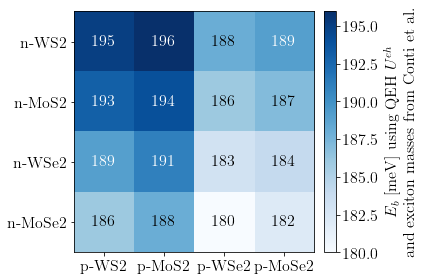

In [45]:
vdWH_qeh_article_masses = load_hs('wannier_qeh_article_masses', nFilling, nPadding)
fig = plt.figure(1, figsize=(6,6))
print('Exciton binding energies for different\n bilayer combinations with {} encapsulating and {} inner hBN layers\n QEH Potential using Masses from Conti et al.'.format(nPadding, nFilling))
plot_E_B(vdWH_qeh_article_masses, cbarlabel='$E_b$ [meV] using QEH $U^{eh}$ \n and exciton masses from Conti et al.', file_ending='qeh_articMass')

# Discussion: Comparison of Binding energies from Conti et al. and Wannier model using QEH and screened potential

In [46]:
def read_bilayer_E_b(bilayer, vdWH):
    '''@returns U_ee, U_eh, U_eh_r, epsM, E_b
    '''
    i = list(vdWH['bilayer']).index(bilayer)
    E_b = vdWH['E_b'][i]
    return E_b

In [47]:
bilayers = ['n-WS2, p-WS2', 'n-MoS2, p-MoS2', 'n-WSe2, p-WSe2', 'n-MoSe2, p-MoSe2']

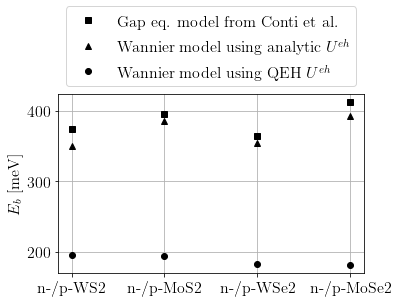

In [91]:
fig = plt.figure(1,figsize=(5.8,4.5))
E_bs_article = np.zeros(len(bilayers))
E_bs_analytic = np.zeros(len(bilayers))
E_bs_qeh = np.zeros(len(bilayers))
for (i, bilayer) in enumerate(bilayers):
    j = list(vdWH_qeh_article_masses['bilayer']).index(bilayer)
    E_bs_article[i] = Eb_article.transpose().flatten()[j] * 10**(-3)

    E_bs_analytic[i] = read_bilayer_E_b(bilayer, vdWH_analytic)
    E_bs_qeh[i] = read_bilayer_E_b(bilayer, vdWH_qeh_article_masses)

xtick_labels = ['n-/p-' + m for m in materials]
plt.plot(xtick_labels, E_bs_article*10**3, 'ks', label='Gap eq. model from Conti et al.')
plt.plot(xtick_labels, E_bs_analytic*10**3, 'k^', label='Wannier model using analytic $U^{eh}$')
plt.plot(xtick_labels, E_bs_qeh*10**3, 'ko', label='Wannier model using QEH $U^{eh}$')
plt.ylabel(r'$E_b$ [meV]')
plt.grid()
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand", ncol=1)
plt.tight_layout()
plt.savefig('./plots/E_b_comparison.pdf')
plt.savefig('./plots/E_b_comparison.png')